<a href="https://www.linkedin.com/in/amit-maindola-51801423/"><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Loan Eligibility Assignment</font></h1>

## Introduction
User need to Implement a Machine Learning Model to predict the Load Eligibility of the Applicant based on customer details provided while filling online application form. Go through [Readme.md](./Readme.md) for more details

In [72]:
# Import all required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

Let's Import the File and view the Realation

In [73]:
df = pd.read_csv('LoanApplicantData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Rename the columns to lower case for ease of use

In [75]:
# Change columns to lowercase
df.rename(columns = lambda x : x.lower(), inplace=True)
df.rename(columns={'applicantincome':'applicant_income', 'loanamount':'loan_amount','coapplicantincome':'coapplicant_income'}, inplace=True)
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
print('No. of Rows : {} and columns(Features) : {} in the DataSet'.format(df.shape[0], df.shape[1]))

No. of Rows : 614 and columns(Features) : 13 in the DataSet


Let's view the Count, mean other Features in the data set

In [6]:
df.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['loan_status'].value_counts()

Y    422
N    192
Name: loan_status, dtype: int64

From the Distribution of Loan Approval we can see 422 Applicant's got their Loan Approved while 192 got rejected.<br>
Now let's Viusalize the relationship

## Relationship Visualization

### Categorical Features

#### Credit History

In [18]:
df['credit_history'].value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

credit_history  loan_status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: loan_status, dtype: float64


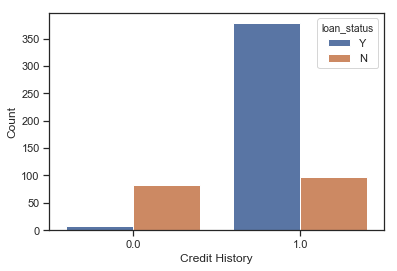

In [19]:
print(df.groupby(['credit_history'])['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="credit_history", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('Credit History')
plt.show()

From the above relationship we can observe 
* Most of the Applicants have *Credit Histroy* 
* Only 7% of Applicant's are considered eligible for loan credit history 0
* 79% of Applicant's with credit_hitory = 1 got their loan approved
* Credit History plays important role in Loan Eligibility

#### Gender

In [20]:
df['gender'].value_counts()

Male      489
Female    112
Name: gender, dtype: int64

gender  loan_status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: loan_status, dtype: float64


Text(0.5, 0, 'Gender')

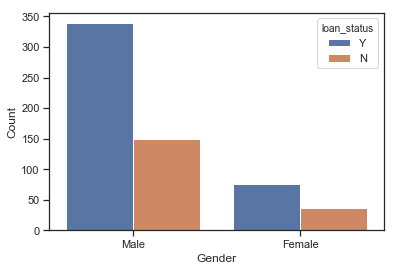

In [24]:
print(df.groupby('gender')['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="gender", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('Gender')

From the above relationship we can observe 
* Most of loan Applicant's are Male
* Gender alone does not play any important role in Loan Eligibility

#### Property Area

In [25]:
df['property_area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64

property_area  loan_status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: loan_status, dtype: float64


Text(0.5, 0, 'Property Area')

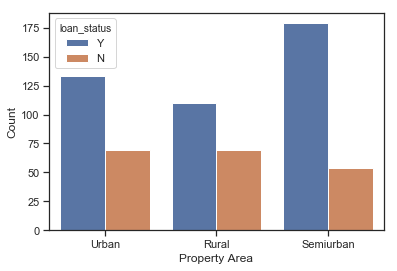

In [27]:
print(df.groupby('property_area')['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="property_area", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('Property Area')

From the above relationship we can observe 
* Most of loan Applicant's are from *Semi-Urban* region
* Loan Eligibility chances are slightly better for *Semi-Urban* region due to High number of Applicants
* Property Area alone does not seem to play an important role in Loan Eligibility

#### Married

In [28]:
df['married'].value_counts()

Yes    398
No     213
Name: married, dtype: int64

married  loan_status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: loan_status, dtype: float64


Text(0.5, 0, 'Maritial Status')

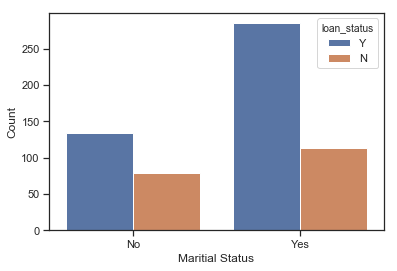

In [29]:
print(df.groupby('married')['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="married", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('Maritial Status')

From the above relationship we can observe 
* Most of loan Applicant's are *Married*
* Loan Eligibility chances are slightly better for *Married* Applicants
* Maritial status alone does not seem to play an important role in Loan Eligibility

#### Education

In [30]:
df['education'].value_counts()

Graduate        480
Not Graduate    134
Name: education, dtype: int64

education     loan_status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: loan_status, dtype: float64


Text(0.5, 0, 'Education')

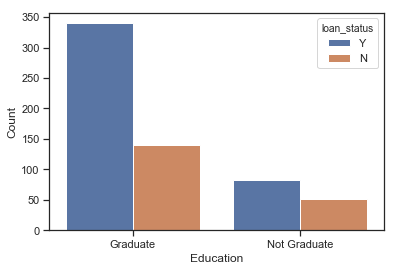

In [31]:
print(df.groupby('education')['loan_status'].value_counts(normalize=True))
# print(df.groupby('education')['loan_status'].value_counts(normalize=False))
sns.countplot(data=df, x="education", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('Education')

From the above relationship we can observe 
* Most of loan Applicant's are *Educated*
* Loan Eligibility chances are somewhat better for *Graduate* Applicants due to High number of Applicants
* Education has plays an  role in Loan Eligibility

#### Self Employed

In [32]:
df['self_employed'].value_counts()

No     500
Yes     82
Name: self_employed, dtype: int64

self_employed  loan_status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: loan_status, dtype: float64


Text(0.5, 0, 'Self-Employed')

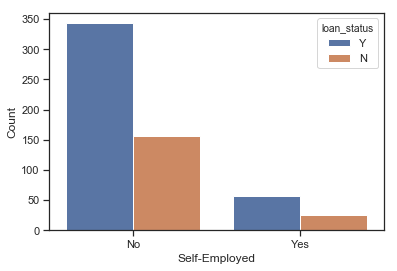

In [33]:
print(df.groupby('self_employed')['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="self_employed", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('Self-Employed')

From the above relationship we can observe 
* Most of loan Applicant's are not *Self-Employed*
* Loan Eligibility looks same for Self-Employed or Not despite variance in number of Applicants for each category
* Self Employement does not play an important role in Loan Eligibility

#### Dependents

In [34]:
df['dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64

dependents  loan_status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: loan_status, dtype: float64


Text(0.5, 0, 'No. of Dependents')

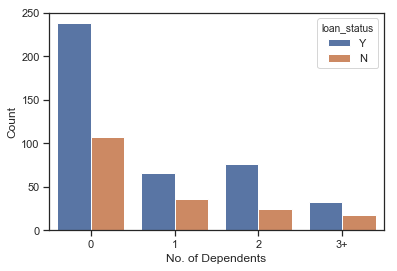

In [35]:
print(df.groupby('dependents')['loan_status'].value_counts(normalize=True))
sns.countplot(data=df, x="dependents", hue="loan_status")
plt.ylabel('Count')
plt.xlabel('No. of Dependents')

From the above relationship we can observe 
* Most of loan Applicant's do not have *Dependent*
* Loan Eligibility is better for No. of dependents(1) compared to No. of dependents(2)
* No. of dependents does not seem to play an important role in Loan Eligibility

#### Loan Amount Term

In [36]:
df['loan_amount_term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: loan_amount_term, dtype: int64

In [37]:
print(df.groupby('loan_amount_term')['loan_status'].value_counts(normalize=False))

loan_amount_term  loan_status
12.0              Y                1
36.0              N                2
60.0              Y                2
84.0              Y                3
                  N                1
120.0             Y                3
180.0             Y               29
                  N               15
240.0             Y                3
                  N                1
300.0             Y                8
                  N                5
360.0             Y              359
                  N              153
480.0             N                9
                  Y                6
Name: loan_status, dtype: int64


<Figure size 720x576 with 0 Axes>

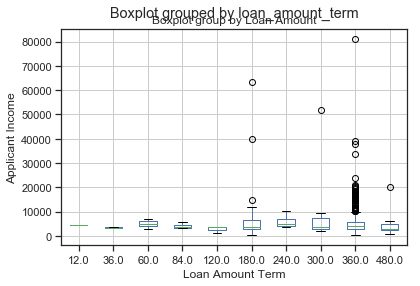

In [47]:
plt.figure(figsize=(10,8))
df.boxplot(column='applicant_income', by='loan_amount_term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Applicant Income')
plt.title('Boxplot group by Loan Amount')
plt.show()

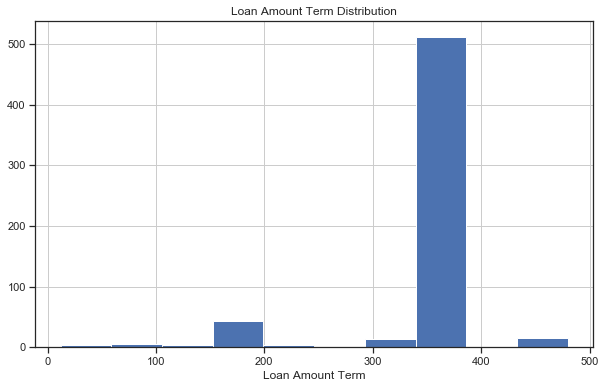

In [49]:
bins = np.linspace(df.loan_amount_term.min(), df.loan_amount_term.max())
plt.figure(figsize=(10,6))
df['loan_amount_term'].hist()
plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan Amount Term')
plt.show()


From the above relationship we can observe 
* Lower values of Loan Term can be ignored as we don't have sufficient number of data for them
* Most of the applicant's are applying for Term 180 or 360
* There are a lot of Outliers for Term 360

### Numerical Features

#### Applicant Income

Text(0.5, 0, 'Applicant Income')

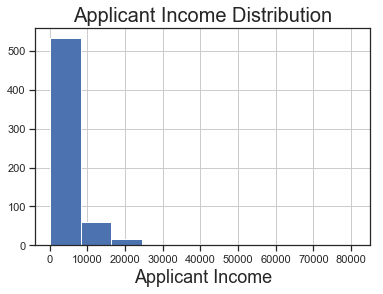

In [181]:
# plt.figure(figsize=(10,6))
df['applicant_income'].hist()
plt.title('Applicant Income Distribution', fontsize=20)
plt.xlabel('Applicant Income', fontsize=18)

Text(0.5, 0, 'Gender')

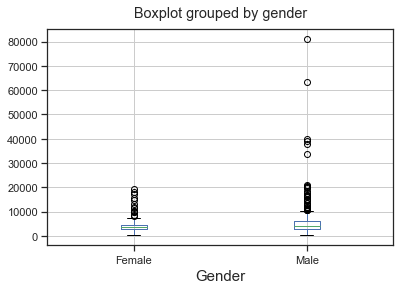

In [97]:
ax = df.boxplot(column='applicant_income', by='gender')
ax.set_title('')
plt.xlabel('Gender', fontsize=15)

**There are a lot of outliers in Male Applicants**

Text(0.5, 0, 'Education')

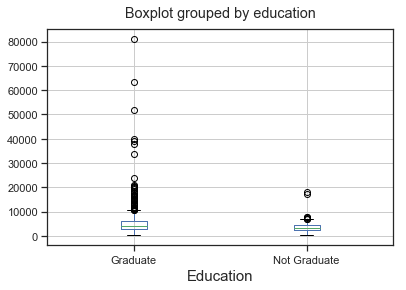

In [99]:
ax = df.boxplot(column='applicant_income', by='education')
ax.set_title('')
plt.xlabel('Education', fontsize=15)

**There are lot of Outliers of Graduate Applicants**

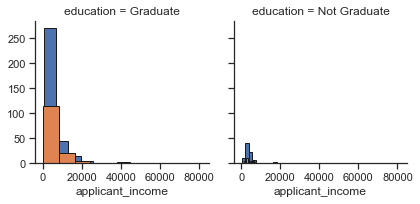

In [113]:
fig = sns.FacetGrid(data=df, col="education", hue="loan_status", col_wrap=2)
ax = fig.map(plt.hist, 'applicant_income', ec='k')
# plt.figure(figsize=(15,10))

Text(0.5, 0.98, 'Scatter Plot - Applicant Incomce vs Loan Amount')

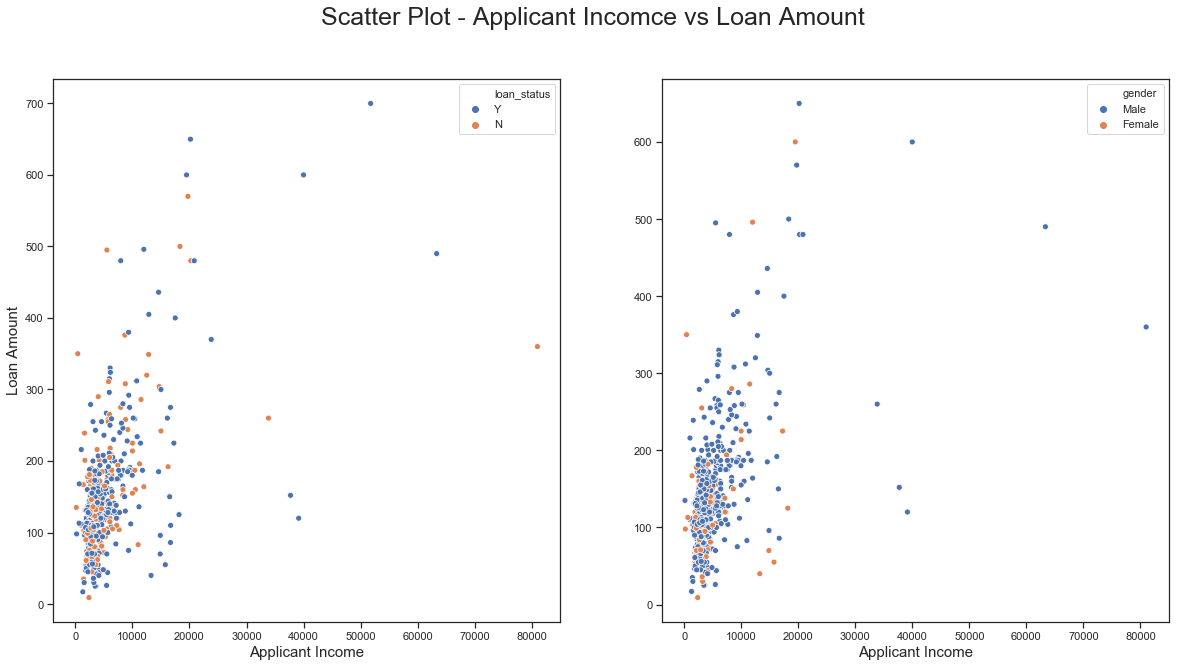

In [162]:
plt.figure(figsize=(20,10))
plt.subplot(121)
ax = sns.scatterplot(data=df, x=df.applicant_income, y=df.loan_amount, hue='loan_status')
ax.set_xlabel('Applicant Income', fontsize=15)
ax.set_ylabel('Loan Amount', fontsize=15)

plt.subplot(122)
ax = sns.scatterplot(data=df, x=df.applicant_income, y=df.loan_amount, hue=df.gender)
ax.set_xlabel('Applicant Income', fontsize=15)
ax.set_ylabel('')
plt.suptitle('Scatter Plot - Applicant Incomce vs Loan Amount', fontsize=25)

From the above visualization we can observe 
* There are a lot of Outliers in the dataset, it is possible as Applicant can have extreme need based on their Income
* Loan Eligibility is better for No. of dependents(1) compared to No. of dependents(2)
* No. of dependents does not seem to play an important role in Loan Eligibility
* There are a lot of outliers in Male Applicants

View the Distribution of Gender and Education

#### Loan Amount

Text(0.5, 0, 'Applicant Income')

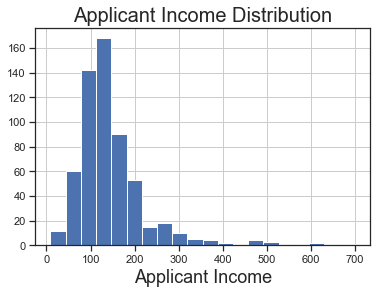

In [176]:
# plt.figure(figsize=(10,6))
df['loan_amount'].hist(bins=20)
plt.title('Applicant Income Distribution', fontsize=20)
plt.xlabel('Applicant Income', fontsize=18)

Let's transform the Loan Amount to its logrithmic form and take out the Outlier effect

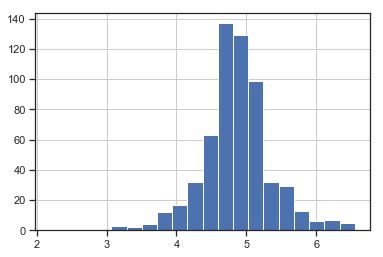

In [185]:
np.log(df.loan_amount).hist(bins=20)

## Data Preparation

Let's convert all the inputs to their Numric form which could be used by sklearn

### Categorical features to numerical values

In [76]:
df.dtypes

loan_id                object
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [77]:
df['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
df['married'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
df['education'].replace(to_replace=['Graduate','Not Graduate'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['Y','N'], value=[0,1],inplace=True)
df['self_employed'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
df['property_area'].replace(to_replace=['Rural','Semiurban','Urban'], value=[0,1,2],inplace=True)
df['dependents'].replace(to_replace=['0', '1', '2', '3+'], value=[0, 1, 2, 3],inplace=True)

In [79]:
df.dtypes

loan_id                object
gender                float64
married               float64
dependents            float64
education               int64
self_employed         float64
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area           int64
loan_status             int64
dtype: object

### Missing Values

In [81]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0], inplace=True)
df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mean(), inplace=True)
df['loan_amount'].fillna(df['loan_amount'].mean(), inplace=True)

In [82]:
df.describe()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.346906,0.744300,0.218241,0.866450,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [83]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,0.0,1.0,0.0,0,1.0,5849,0.0,146.412162,360.0,1.0,2,0
1,LP001003,0.0,0.0,1.0,0,1.0,4583,1508.0,128.000000,360.0,1.0,0,1
2,LP001005,0.0,0.0,0.0,0,0.0,3000,0.0,66.000000,360.0,1.0,2,0
3,LP001006,0.0,0.0,0.0,1,1.0,2583,2358.0,120.000000,360.0,1.0,2,0
4,LP001008,0.0,1.0,0.0,0,1.0,6000,0.0,141.000000,360.0,1.0,2,0


### Add new Columns

In [84]:
df['total_income'] = df['applicant_income'] + df['coapplicant_income']
df['loan_amount_log'] = np.log(df['loan_amount'])
df['total_income_log'] = np.log(df['total_income'])

In [85]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income,loan_amount_log,total_income_log
0,LP001002,0.0,1.0,0.0,0,1.0,5849,0.0,146.412162,360.0,1.0,2,0,5849.0,4.986426,8.674026
1,LP001003,0.0,0.0,1.0,0,1.0,4583,1508.0,128.000000,360.0,1.0,0,1,6091.0,4.852030,8.714568
2,LP001005,0.0,0.0,0.0,0,0.0,3000,0.0,66.000000,360.0,1.0,2,0,3000.0,4.189655,8.006368
3,LP001006,0.0,0.0,0.0,1,1.0,2583,2358.0,120.000000,360.0,1.0,2,0,4941.0,4.787492,8.505323
4,LP001008,0.0,1.0,0.0,0,1.0,6000,0.0,141.000000,360.0,1.0,2,0,6000.0,4.948760,8.699515


### Feature Selection

In [86]:
Features = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area', 'loan_amount_term', 'total_income_log', 'loan_amount_log']
X = df[Features]
y = df['loan_status']
X.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_amount_term,total_income_log,loan_amount_log
0,0.0,1.0,0.0,0,1.0,1.0,2,360.0,8.674026,4.986426
1,0.0,0.0,1.0,0,1.0,1.0,0,360.0,8.714568,4.852030
2,0.0,0.0,0.0,0,0.0,1.0,2,360.0,8.006368,4.189655
3,0.0,0.0,0.0,1,1.0,1.0,2,360.0,8.505323,4.787492
4,0.0,1.0,0.0,0,1.0,1.0,2,360.0,8.699515,4.948760


### Normalize data

In [87]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [88]:
X[:5]

array([[-0.47234264,  1.37208932, -0.73780632, -0.52836225,  0.39260074,
         0.41173269,  1.22329839,  0.27985054,  0.00846848,  0.25063985],
       [-0.47234264, -0.72881553,  0.25346957, -0.52836225,  0.39260074,
         0.41173269, -1.31851281,  0.27985054,  0.08290346, -0.02022573],
       [-0.47234264, -0.72881553, -0.73780632, -0.52836225, -2.54711697,
         0.41173269,  1.22329839,  0.27985054, -1.21736328, -1.35520231],
       [-0.47234264, -0.72881553, -0.73780632,  1.89264089,  0.39260074,
         0.41173269,  1.22329839,  0.27985054, -0.30127292, -0.15029909],
       [-0.47234264,  1.37208932, -0.73780632, -0.52836225,  0.39260074,
         0.41173269,  1.22329839,  0.27985054,  0.05526627,  0.17472681]])

### Train Test Split  
Let's split the data in to Training and Testing set

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 10) (491,)
Test set: (123, 10) (123,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [ ]:
#### Function to plot Confusion Matrix

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [91]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.69918699, 0.78861789, 0.7398374 , 0.78861789, 0.78861789,
       0.7804878 , 0.7804878 , 0.7804878 , 0.77235772])

#### Find the best K

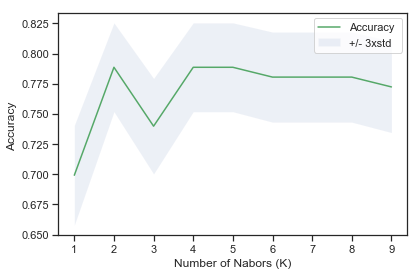

In [92]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Create the model with best K
##### Best accuracy was with k = 4

In [93]:
# Create and Train the Model on Training Data Set
k = 4
#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Decision Tree

In [94]:
# Create and Train the Model on Training Data Set
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Support Vector Machine

In [96]:
# Create and Train the Model on Training Data Set
from sklearn import svm
clf = svm.SVC(kernel='rbf', probability=True, gamma='auto')
clf.fit(X_train, y_train) 
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Logistic Regression

In [97]:
# Create and Train the Model on Training Data Set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Model Evaluation using Test set

### Import Libraries to measure the accuraccy of the Model

##### View the Accuracy of Model
Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [98]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

### K Nearest Neighbor(KNN)

In [99]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 10), (491,), (123, 10), (123,))

In [123]:
# Get the Prediction from Model
yhat_k = neigh.predict(X_test)
yhat_prob = neigh.predict_proba(X_test)

print(y_test[0:5])
print(yhat_k[0:5])
print(yhat_prob[0:5])

len(X_test)

547    0
239    0
166    1
209    1
157    0
Name: loan_status, dtype: int64
[0 0 0 0 0]
[[0.75 0.25]
 [1.   0.  ]
 [0.75 0.25]
 [1.   0.  ]
 [0.75 0.25]]


123

#### Create a list to save the Metrics evaluation

In [124]:
acceval_df = pd.DataFrame(data={"Jaccard":[0,0,0,0,],"F1-Score":[0,0,0,0,],"Log Loss":[0,0,0,0,]}, index=['KNN','Decision','SVM','Logistic Regression'])
acceval_df.head()

,Jaccard,F1-Score,Log Loss
KNN,0,0,0
Decision,0,0,0
SVM,0,0,0
Logistic Regression,0,0,0


#### Accuracy evaluation
In multilabel classification, __accuracy classification score__ function computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how match the actual labels and predicted labels are in the test set.

In [125]:
acceval_df.iloc[0] = [round(jaccard_similarity_score(y_test, yhat_k),2),round(f1_score(y_test, yhat_k, average='weighted'),2),"NA"]
acceval_df.head()

print("Train set Accuracy: ", accuracy_score(y, neigh.predict(X)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_k))

Train set Accuracy:  0.8127035830618893
Test set Accuracy:  0.7886178861788617


              precision    recall  f1-score   support

           0       0.77      0.98      0.86        83
           1       0.89      0.40      0.55        40

   micro avg       0.79      0.79      0.79       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.79      0.76       123

Confusion matrix, without normalization
[[81  2]
 [24 16]]


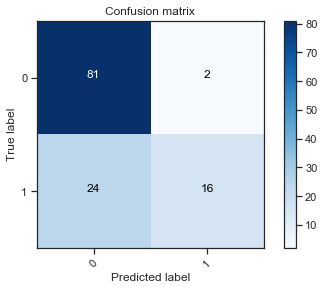

In [126]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_k, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_k))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],normalize= False,  title='Confusion matrix')

## Decision Tree

In [127]:
predTree = loanTree.predict(X_test)
predTree_prob = loanTree.predict_proba(X_test)

print(predTree [0:5])
print(y_test [0:5])
print(predTree_prob[0:5])


[0 0 0 0 0]
547    0
239    0
166    1
209    1
157    0
Name: loan_status, dtype: int64
[[0.7  0.3 ]
 [0.87 0.13]
 [0.96 0.04]
 [0.7  0.3 ]
 [0.81 0.19]]


In [128]:
acceval_df.iloc[1] = [round(jaccard_similarity_score(y_test, predTree),2),round(f1_score(y_test, predTree, average='weighted'),2),"NA"]
acceval_df.head()

print("Train set Accuracy: ", accuracy_score(y, neigh.predict(X)))
print("Test set Accuracy: ", accuracy_score(y_test, predTree))

Train set Accuracy:  0.8127035830618893
Test set Accuracy:  0.7967479674796748


#### Compute the Confusion Matrix

              precision    recall  f1-score   support

           0       0.77      0.99      0.87        83
           1       0.94      0.40      0.56        40

   micro avg       0.80      0.80      0.80       123
   macro avg       0.86      0.69      0.71       123
weighted avg       0.83      0.80      0.77       123

Confusion matrix, without normalization
[[82  1]
 [24 16]]


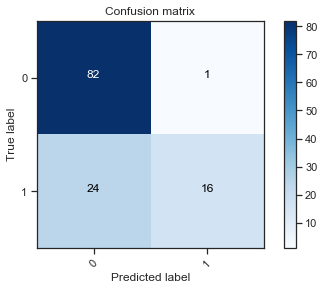

In [129]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

## Support Vector Machine

In [130]:
yhat_svm = clf.predict(X_test)
yhat_svm_prob = clf.predict_proba(X_test)
print('')

print(yhat_svm [0:5])
print(y_test [0:5])
print(yhat_svm_prob[0:5])


[0 0 0 0 0]
547    0
239    0
166    1
209    1
157    0
Name: loan_status, dtype: int64
[[0.8  0.2 ]
 [0.83 0.17]
 [0.79 0.21]
 [0.81 0.19]
 [0.82 0.18]]


In [131]:
acceval_df.iloc[2] = [round(jaccard_similarity_score(y_test, yhat_svm),2),round(f1_score(y_test, yhat_svm, average='weighted'),2),"NA"]
acceval_df.head()

print("Train set Accuracy: ", accuracy_score(y, loanTree.predict(X)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_svm))

Train set Accuracy:  0.8208469055374593
Test set Accuracy:  0.7967479674796748


#### Compute the Confusion Matrix

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        83
           1       0.89      0.42      0.58        40

   micro avg       0.80      0.80      0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.77       123

Confusion matrix, without normalization
[[81  2]
 [23 17]]


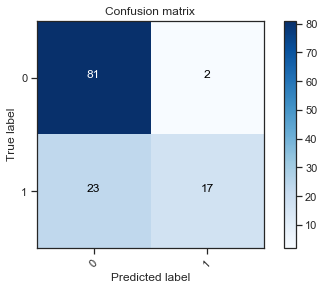

In [132]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

## Logistic Regression

In [133]:
yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print(y_test[0:5])
print(yhat_lr[0:5])
print(yhat_lr_prob[0:5])

547    0
239    0
166    1
209    1
157    0
Name: loan_status, dtype: int64
[0 0 0 0 0]
[[0.61 0.39]
 [0.7  0.3 ]
 [0.67 0.33]
 [0.64 0.36]
 [0.7  0.3 ]]


In [134]:
acceval_df.iloc[3] = [round(jaccard_similarity_score(y_test, yhat_lr),2),round(f1_score(y_test, yhat_lr, average='weighted'),2),round(log_loss(y_test, yhat_lr_prob),2)]
acceval_df.head()

# print("Train set Accuracy: ", accuracy_score(y, loanTree.predict(X)))
# print("Test set Accuracy: ", accuracy_score(y_test, yhat_lr))

,Jaccard,F1-Score,Log Loss
KNN,0.79,0.76,NA
Decision,0.80,0.77,NA
SVM,0.80,0.77,NA
Logistic Regression,0.79,0.76,0.55


              precision    recall  f1-score   support

           0       0.77      0.98      0.86        83
           1       0.89      0.40      0.55        40

   micro avg       0.79      0.79      0.79       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.79      0.76       123

Confusion matrix, without normalization
[[81  2]
 [24 16]]


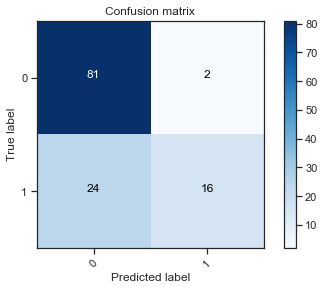

In [135]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [136]:
acceval_df.head()

,Jaccard,F1-Score,Log Loss
KNN,0.79,0.76,NA
Decision,0.80,0.77,NA
SVM,0.80,0.77,NA
Logistic Regression,0.79,0.76,0.55
